# Build and train a SVM model

## Data preprocessing

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
data = pd.read_csv("Social_Network_Ads.csv")
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
x[:5, :]

array([[   19, 19000],
       [   35, 20000],
       [   26, 43000],
       [   27, 57000],
       [   19, 76000]])

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


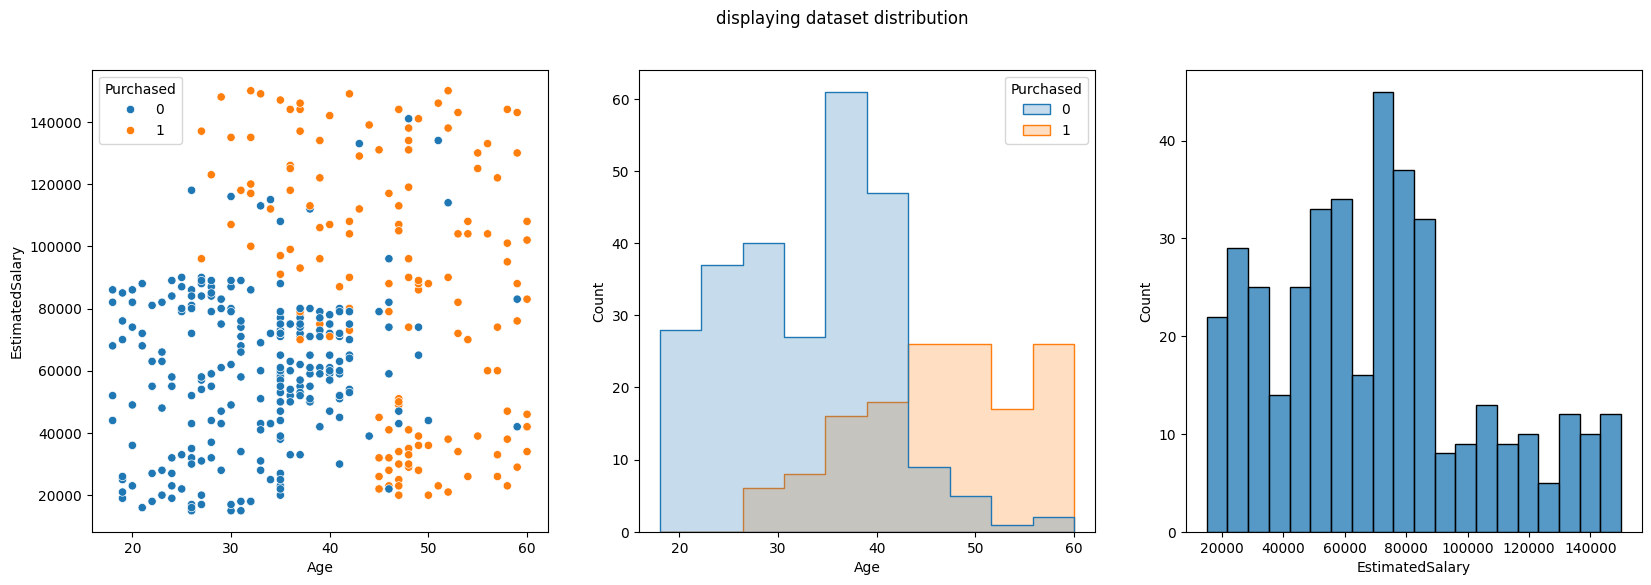

In [17]:
import seaborn as sns
fig, axe  = plt.subplots(1, 3, figsize=(20, 6))

sns.scatterplot(data=data, x="Age", y='EstimatedSalary', hue='Purchased', ax=axe[0])
sns.histplot(data=data, x="Age", ax=axe[1], hue='Purchased',element='step')
sns.histplot(data=data, x='EstimatedSalary', ax=axe[2], bins=20)
fig.suptitle("displaying dataset distribution")
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

## Build the model

In [20]:
from sklearn.svm import SVC
support_model = SVC(kernel='linear' ,random_state=0)
support_model.fit(x_train_scaled, y_train)

SVC(kernel='linear', random_state=0)

In [21]:
y_pred = support_model.predict(x_test_scaled)
y_pred[:5]

array([0, 0, 0, 0, 0])

In [22]:
np.concatenate((y_test.reshape(-1, 1), y_pred.reshape(-1, 1)), 1)[:20, :]

array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0]])

## Model evaluation

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score
import plotly.graph_objects as go
print(f"Accuracy Score is: {accuracy_score(y_test, y_pred)}")
cm = confusion_matrix(y_test, y_pred)
fig_2 = go.Figure(data=go.Heatmap(z=cm, text=cm, texttemplate='%{text}', colorscale="Blues", showscale=True))
fig_2.update_layout(width=500, xaxis_title="predicted", yaxis_title="Actual")
fig_2.update_yaxes(autorange="reversed")
fig_2.show()

Accuracy Score is: 0.9


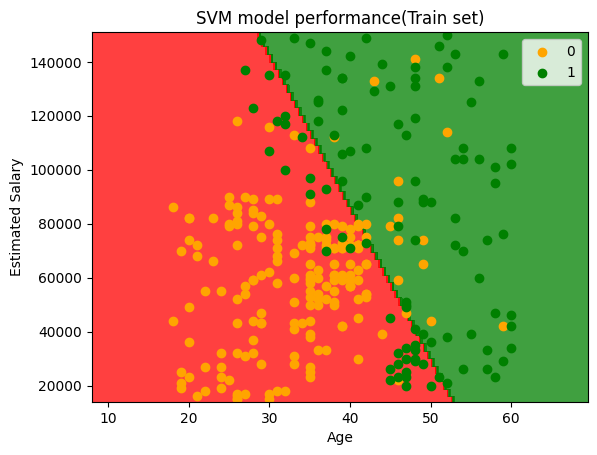

In [24]:
from matplotlib.colors import ListedColormap
X_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step=0.5),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step=0.5))
plt.contourf(X1, X2, support_model.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color= ListedColormap(('orange', 'green'))(i), label = j)
plt.title("SVM model performance(Train set)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()

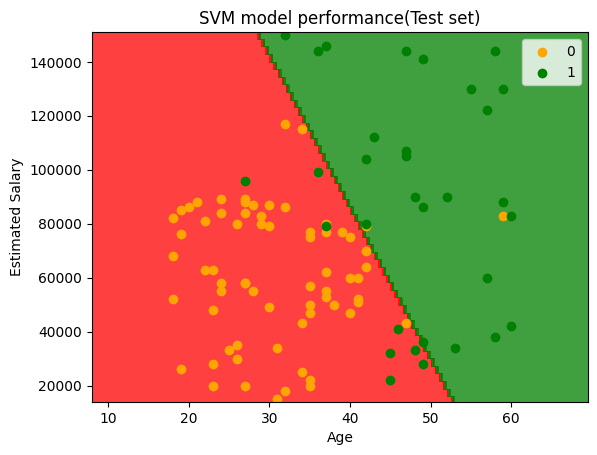

In [25]:
from matplotlib.colors import ListedColormap
X_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step=0.5),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step=0.5))
plt.contourf(X1, X2, support_model.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color= ListedColormap(('orange', 'green'))(i), label = j)
plt.title("SVM model performance(Test set)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()